# Regressão 01 - tarefa 03 - transformações em X e Y

In [3]:
#carregando pacotes
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [4]:
#carregando base de gorjetas 
tips = sns.load_dataset("tips")

#adicionando novas colunas: porcentagem de gorjeta e valor da conta sem gorjeta.
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [6]:
#1) criando a matriz de desing, para melhor visualização da matriz, iremos utilizar apenas as 5 primeiras linhas do DataFrame.

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips[:5]) #+1 se dá para calcular o intercepto. 
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

Com o modelo abaixo, analisaremos 'P>|t|' que nos mostra a significancia das variáveis, valores até 5% mostram variáveis a considerar, além disso, são var menos significantes para explicar o nosso y. Agora para fins de criação de modelo, usarei todas as linhas do DataFrame. Teremos um modelo aonde a variável tip é explicada por sex, smoker, time e net_bill:

In [7]:
modelo= smf.ols('tip ~ sex + smoker + time + net_bill + 1', data = tips).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.64e-20
Time:                        16:02:09   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando o sumário do sumário acima percebemos que as nossas variáveis explicam 33,5% do modelo. E com base no P>|t| percemos que a única variável que é significante, muito significante, é net_bill.

In [8]:
#2) Excluindo do modelo sex, smoker e time 
modelo= smf.ols('tip ~ net_bill + 1', data = tips).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           5.02e-23
Time:                        16:03:11   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Obviamente o nosso R-quadrado diminuiu um pouco, porque ele realmente tende a diminuir conforme diminui-se o nº de variáveis explicativas, mas tudo bem pois as outras variáveis não explicavam muita coisa mesmo, visto que a diminuição do R-quadrado foi quase irrelevante. 

In [9]:
#3)salvando o resíduo do modelo acima em uma nova coluna no nosso dataFrame:
tips['residuo']=modelo.resid

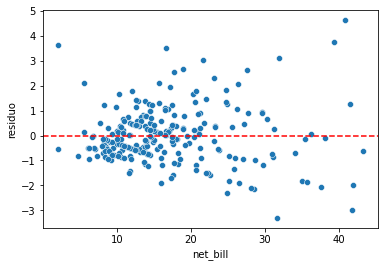

In [11]:
#exibindo o gráfico do resíduo por net_bill
sns.scatterplot(x = 'net_bill', y = 'residuo', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

INCIANDO TRANSFORMAÇÕES NA NOSSA BASE, COM LOG E POLINÔMIO DE NET_BILL:

In [12]:
#4) TRANSFORMANDO NET_BILL PARA LOG
modelo2= smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           4.40e-20
Time:                        16:04:58   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#salvando o resíduo do modelo acima em uma nova coluna no nosso dataFrame:
tips['res_log_net_bill']=modelo2.resid

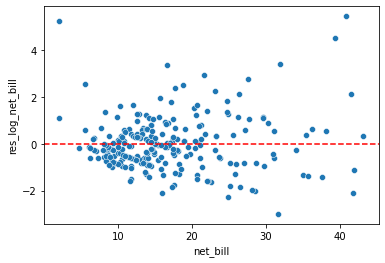

In [14]:
#plotando o gráfico do resíduo do modelo 2 por net_bill
sns.scatterplot(x = 'net_bill', y = 'res_log_net_bill', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O nosso modelo 2 obteve um R-quadrado menor que o primeiro modelo realizado, por hora, preferimos o primeiro modelo. Mas vamos testar a transformação de net_bill para polinômio.

In [18]:
#4.1 transformando net_bill em polinômio:
modelo3 = smf.ols('tip ~  net_bill + np.power(net_bill,2)', data = tips).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           4.96e-22
Time:                        16:05:35   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

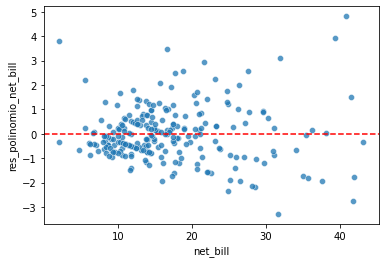

In [19]:
#salvando o resíduo do modelo acima em uma nova coluna no nosso dataFrame:
tips['res_polinomio_net_bill'] = modelo3.resid

#plotando o gráfico do resíduo do modelo 3 por net_bill
sns.scatterplot(x = 'net_bill', y = 'res_polinomio_net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

O modelo que nos trouxe um melhor R-quadrado foi o modelo3 onde transformamos net_bill (variável explicativa de tip) para polinômio. Portanto, esse é o modelo escolhido.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [20]:
#1) criando a matriz de log de tip explicada por sex, smoker, time e net_bill - utilizando 5 primeiras linhas apenas para facilitar a visualização

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', tips[:5]) #+1 se dá para calcular o intercepto. 
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [21]:
#2) analisando quais variáveis não são significantes para posteriormente removê-las (utilizando todas as linhas do nosso df)
modelo4= smf.ols('np.log(tip) ~ sex + smoker + time + net_bill + 1', data = tips).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.21e-18
Time:                        16:06:45   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.60e-21
Time:                        16:10:45   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

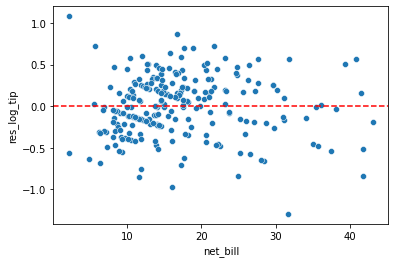

In [28]:
#2.1) Deixando apenas a variável net_bill
modelo4= smf.ols('np.log(tip) ~ net_bill + 1', data = tips).fit()
print(modelo4.summary())

#3)criando uma nova variável no data frame para guardar o redíduo de log de tip x net_bill
tips['res_log_tip']=modelo4.resid

#3.1)observe o gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'res_log_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Observando o gráfico podemos ter uma base de quanto é 31,1% de explicação da nossa variável, enquanto temos uma linha média que se encontra em 0, a maioria dos nossos pontos tem uma distância de 0.5 dessa linha, para mais e para menos. 

ABAIXO, ALÉM DE TERMOS TIP EM LOG, VAMOS TRANFORMAR TAMBÉM NET_BILL EM LOG:

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           5.62e-22
Time:                        16:16:56   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

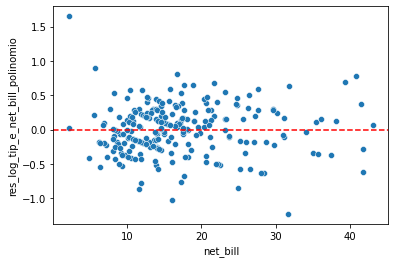

In [33]:
#4)teste transformar net_bill em log
modelo5= smf.ols('np.log(tip) ~ np.log(net_bill) + 1', data = tips).fit()
print(modelo5.summary())

#salvando o resídu do modelo 5 em uma variável.
tips['res_log_tip_e_net_bill_polinomio']= modelo5.resid


#4.1)observe o gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'res_log_tip_e_net_bill_polinomio', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

AGORA VAMOS TRANSFORMAR NET_BILL EM POLINÔMIO:

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.82e-22
Time:                        16:17:27   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.18

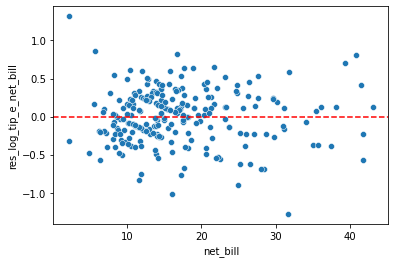

In [34]:
#4.2) TRANSFORMANDO NET_BILL EM POLINÔMIO, ENQUANTO TIP É LOG
modelo6 = smf.ols('np.log(tip) ~  net_bill + np.power(net_bill,2)', data = tips).fit()
print(modelo6.summary())

#salvando o resídu do modelo 6 em uma variável.
tips['res_log_tip_e_net_bill']= modelo6.resid


#4.1)observe o gráfico de resíduos em função de net_bill
sns.scatterplot(x = 'net_bill', y = 'res_log_tip_e_net_bill', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Entre todos os modelos analisados o modelo6 nos trouxe o maior R-quadrado.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [39]:
#carregando a base 
dados=pd.read_csv('previsao_de_renda.csv', index_col=0)
dados=pd.DataFrame(dados)

In [80]:
dados.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,res,res_tempo_polinomio
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24,-400.032850,-441.642953
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14,3010.019987,2608.820589
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98,701.056389,1078.481469
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69,4359.282904,3723.873615
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37,-2415.076609,-1992.092249


In [44]:
#1) regressão: váriavel renda explicada pela variável tempo_emprego
reg1=smf.ols('renda~ tempo_emprego', data = dados).fit()

reg1.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:29:57   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nosso R-quadrado nos mostra que o modelo explica 15,5% da variável renda. E o sumário também nos mostra que a variável tempo emprego é muito relevante. A seguir iremos salvar em uma variável o resíduo desse modelo e posteriormente plotá-lo em um gráfico em função da variável tempo_emprego. 

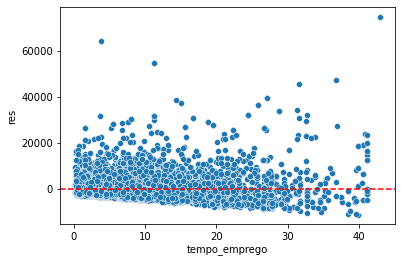

In [56]:
#2)salvando em uma nova coluna do df o reesíduo desse modelo.
dados['res']=reg1.resid

#plotando o gráfico do resíduo em função do tempo_emprego:
sns.scatterplot(x = 'tempo_emprego', y = 'res', data = dados)
plt.axhline(y=0, color='r', linestyle='--')

Como temos um R-quadrado diga-se de passagem, pequeno, vamos testar outros métodos. Primeiro iremos fazer um modelo de regressão contendo todas as variáveis explicativas de renda, a fim de ver se tem mais alguma que seja significante. Após encontrar as mais significantes, vamos testar algumas modificações, tanto na variável y quanto nas x. Tentaremos usá-las como polinômio de segundo grau e como logarítimo. 

In [57]:
# regressão: váriavel renda explicada por todas as demais. 
reg2=smf.ols('renda~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau', data = dados).fit()

reg2.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:15:13   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12440   BIC:                         2.442e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -275.6142   1675.894     -0.164      0.869   -3560.625    3009.396
sexo[T.M]                         2366.3093     88.116     26.855      0.000    2193.589    2539.030
posse_de_veiculo[T.True]           -79.2699     84.733     -0.936      0.350    -245.360      86.820
posse_de_imovel[T.True]            348.8880     83.443      4.181      0.000     185.326     512.450
tipo_renda[T.Bolsista]            -817.8078   2155.414     -0.379      0.704   -5042.752    3407.136
tipo_renda[T.Empresário]          1021.9829     90.151     11.336      0.000     845.273    1198.693
tipo_renda[T.Pensionista]         1744.5042   1458.879      1.196      0.232   -1115.124    4604.132
tipo_renda[T.Servidor público]     436.9302    130.517      3.348      0.001     181.097     692.764
educacao[T.Pós graduação]         2207.1796   1081.116      2.042      0.041      88.024    4326.335
educacao[T.Secundário]            -241.1182    437.804     -0.551      0.582   -1099.283     617.046
educacao[T.Superior completo]      338.3998    439.643      0.770      0.441    -523.369    1200.168
educacao[T.Superior incompleto]   -295.7849    471.028     -0.628      0.530   -1219.073     627.503
estado_civil[T.Separado]           144.4038    806.980      0.179      0.858   -1437.401    1726.209
estado_civil[T.Solteiro]           378.8127    792.270      0.478      0.633   -1174.159    1931.784
estado_civil[T.União]              -40.8760    143.778     -0.284      0.776    -322.703     240.951
estado_civil[T.Viúvo]              -38.3778    828.797     -0.046      0.963   -1662.949    1586.193
tipo_residencia[T.Casa]           -356.3831    328.636     -1.084      0.278   -1000.561     287.795
tipo_residencia[T.Com os pais]    -641.1830    368.536     -1.740      0.082   -1363.571      81.204
tipo_residencia[T.Comunitário]    -577.9834    634.095     -0.912      0.362   -1820.907     664.940
tipo_residencia[T.Estúdio]        -976.1533    547.375     -1.783      0.075   -2049.093      96.786
tipo_residencia[T.Governamental]  -883.4601    397.305     -2.224      0.026   -1662.240    -104.680
mau[T.True]                        -19.3616    255.885     -0.076      0.940    -520.935     482.212
qtd_filhos                        -242.7458    790.085     -0.307      0.759   -1791.435    1305.943
idade                               29.8762      4.808      6.213      0.000      20.451      39.301
tempo_emprego                      299.3139      6.146     48.700      0.000     287.267     311.361
qt_pessoas_residencia              308.7311    788.615      0.391      0.695   -1237.077    1854.539
==============================================================================
Omnibus:                    10075.338   Durbin-Watson:                   2.

Fazendo uma análise de todas as variáveis, parecem ser significantes o tempo de emprego, a idade e a posse de imóvel. Portanto, excluiremos as demais. 

In [58]:
#1) regressão: váriavel renda explicada por tempo_emprego, posse_imovel e idade
reg2=smf.ols('renda~ tempo_emprego + posse_de_imovel + idade', data = dados).fit()

reg2.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     776.5
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:16:08   Log-Likelihood:            -1.2247e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12462   BIC:                         2.450e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1954.4110    183.601     10.645      0.000    1594.524    2314.298
posse_de_imovel[T.True]   390.9804     84.427      4.631      0.000     225.491     556.469
tempo_emprego             278.0060      6.249     44.489      0.000     265.757     290.255
idade                      11.9421      4.541      2.630      0.009       3.042      20.842
==============================================================================
Omnibus:                     9986.484   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389946.526
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      29.455   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Temos aqui um R-quadrado bem menor que antes da exclusão das demais variáveis, mas tudo bem, pois ao diminuir o n° de variáveis inseridas na análise diminui-se também o R-quadrado. Como a adição das duas variáveis deram uma diferença minima no R-quadrado, em comparação apenas com o tempo de emprego, vamos utilizar apenas tempo_emprego para facilitar as modificações. Agora, tentaremos transformar renda para log e posteriormente para polinômio, assim também a variável tempo_emprego.

In [67]:
#regressão: log de renda explicada por tempo_emprego, posse_imovel e idade
reg3=smf.ols('np.log(renda)~ (tempo_emprego)', data = dados).fit()

reg3.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:26:00   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002      0.000       7.788       7.827
tempo_emprego     0.0449      0.001     45.802      0.000       0.043       0.047
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                3.050
Skew:                           0.034   Prob(JB):                        0.218
Kurtosis:                       3.037   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#regressão: log de renda explicada por log de tempo emprego
reg4=smf.ols('np.log(renda)~ np.log(tempo_emprego)', data = dados).fit()

reg4.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1394.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          2.85e-289
Time:                        18:26:18   Log-Likelihood:                -14269.
No. Observations:               12466   AIC:                         2.854e+04
Df Residuals:                   12464   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7492      0.013    603.989      0.000       7.724       7.774
np.log(tempo_emprego)     0.2489      0.007     37.333      0.000       0.236       0.262
==============================================================================
Omnibus:                        9.367   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.357
Skew:                           0.062   Prob(JB):                      0.00929
Kurtosis:                       3.049   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#regressão: log de renda explicada por log de tempo emprego
reg4=smf.ols('renda~ np.log(tempo_emprego)', data = dados).fit()

reg4.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          7.66e-236
Time:                        18:26:54   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.1692     78.783     33.156      0.000    2457.742    2766.597
np.log(tempo_emprego)  1372.2043     40.946     33.513      0.000    1291.945    1452.464
==============================================================================
Omnibus:                    10410.764   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           437896.454
Skew:                           3.782   Prob(JB):                         0.00
Kurtosis:                      31.033   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#regressão: log de renda explicada por log de tempo emprego
reg5=smf.ols('np.log(renda)~ tempo_emprego + np.power(tempo_emprego,2)', data = dados).fit()

reg5.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     1049.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:27:54   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.793e+04
Df Residuals:                   12463   BIC:                         2.795e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.8092      0.014    572.799      0.000       7.782       7.836
tempo_emprego                  0.0444      0.003     17.191      0.000       0.039       0.049
np.power(tempo_emprego, 2)  1.665e-05   8.82e-05      0.189      0.850      -0.000       0.000
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                3.046
Skew:                           0.033   Prob(JB):                        0.218
Kurtosis:                       3.037   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#regressão: renda explicada por polinomio quadrado de tempo emprego
reg6=smf.ols('renda~ tempo_emprego + np.power(tempo_emprego,2)', data = dados).fit()

reg6.summary() #resumo da regressão

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:30:43   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3407.0877     81.730     41.687      0.000    3246.885    3567.291
tempo_emprego                 87.0286     15.488      5.619      0.000      56.669     117.388
np.power(tempo_emprego, 2)     7.2469      0.529     13.699      0.000       6.210       8.284
==============================================================================
Omnibus:                     9723.560   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345767.284
Skew:                           3.454   Prob(JB):                         0.00
Kurtosis:                      27.859   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Entre todos os testes realizados, o que se saiu melhor, foi o modelo reg6, pois ele foi o que melhor conseguiu explicar a variabilidade dos nossos dados, trazendo um R-quadrado de 16,8%. 

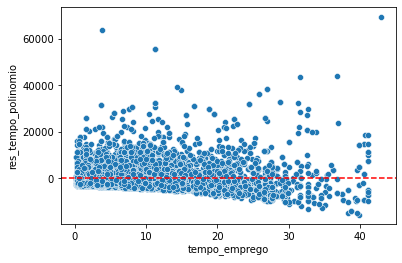

In [78]:
#salvando em uma nova coluna do df o reesíduo do modelo reg6:
dados['res_tempo_polinomio']=reg6.resid

#plotando o gráfico do resíduo em função do tempo_emprego:
sns.scatterplot(x = 'tempo_emprego', y = 'res_tempo_polinomio', data = dados)
plt.axhline(y=0, color='r', linestyle='--')

O nosso modelo explica 16% da variabilidade dos nossos dados, esse valor não é muito alto, isso se dá devido a variabilidade dos dados por conta do grande números de clientes.